<a href="https://colab.research.google.com/github/urenajose/DS-Unit-2-Kaggle-Challenge/blob/master/Jose_Urena_LS_DS_224_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [2]:
%%capture
import sys
"https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/"
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/waterpumps/train_features.csv'), 
                 pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/waterpumps/train_labels.csv'))
test = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/waterpumps/test_features.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [4]:
# labels = pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')
# labels.head()

In [5]:
train.shape

(59400, 41)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
# train, val = train_test_split(train, train_size=0.80, test_size=0.20,
#                               stratify=train['status_group'], random_state=42)

In [8]:
train.shape

(59400, 41)

##Wrangle

In [9]:
def wrangle(X):
  X = X.copy()
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    X[col+'_MISSING'] = X[col].isnull()
  
  duplicates = ['quantity_group', 'payment_type']
  X = X.drop(columns=duplicates)

  unusable_variance = ['recorded_by', 'id']
  X = X.drop(columns=unusable_variance)

  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')

  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()

  return X

In [10]:
train1 = wrangle(train)
# val1 = wrangle(val)
test1 = wrangle(test)

### original wrangle def

In [11]:
# def wrangle(X):
#     """Wrangle train, validate, and test sets in the same way"""
    
#     # Prevent SettingWithCopyWarning
#     X = X.copy()
    
#     # About 3% of the time, latitude has small values near zero,
#     # outside Tanzania, so we'll treat these values like zero.
#     X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
#     # When columns have zeros and shouldn't, they are like null values.
#     # So we will replace the zeros with nulls, and impute missing values later.
#     # Also create a "missing indicator" column, because the fact that
#     # values are missing may be a predictive signal.
#     cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
#                        'gps_height', 'population']
#     for col in cols_with_zeros:
#         X[col] = X[col].replace(0, np.nan)
#         X[col+'_MISSING'] = X[col].isnull()
            
#     # Drop duplicate columns
#     duplicates = ['quantity_group', 'payment_type']
#     X = X.drop(columns=duplicates)
    
#     # Drop recorded_by (never varies) and id (always varies, random)
#     unusable_variance = ['recorded_by', 'id']
#     X = X.drop(columns=unusable_variance)
    
#     # Convert date_recorded to datetime
#     X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
#     # Extract components from date_recorded, then drop the original column
#     X['year_recorded'] = X['date_recorded'].dt.year
#     X['month_recorded'] = X['date_recorded'].dt.month
#     X['day_recorded'] = X['date_recorded'].dt.day
#     X = X.drop(columns='date_recorded')
    
#     # Engineer feature: how many years from construction_year to date_recorded
#     X['years'] = X['year_recorded'] - X['construction_year']
#     X['years_MISSING'] = X['years'].isnull()
    
#     # return the wrangled dataframe
#     return X

##Target

In [12]:
target = 'status_group'

In [13]:
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <=50].index.tolist()

In [14]:
X_train = train1.drop(columns=target)
y_train = train[target]
# X_val = val1.drop(columns=target)
# y_val = val1[target]
X_test = test1

In [15]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
X_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
0,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2011,3,14,12.0,False
1,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,NaN,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,False,False,False,False,False,2013,3,6,3.0,False
2,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,False,False,False,False,False,2013,2,25,4.0,False
3,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,False,False,False,False,False,2013,1,28,27.0,False
4,0.0,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,NaN,True,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,False,False,True,True,True,2011,7,13,NaN,True


In [17]:
# X_val

In [18]:
# encoder_r = ce.OrdinalEncoder()
# imputer_r = SimpleImputer()

In [19]:
# X_train_r = encoder_r.fit_transform(X_train)
# # X_train_random = imputer_r.fit_transform(X_train_r)

In [20]:
# X_train_random

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4]}


In [22]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 4)
# # Fit the random search model
# rf_random.fit(X_train_random, y_train)

In [23]:
# rf_random.best_params_

In [24]:
X_train.shape

(59400, 45)

In [25]:
{'n_estimators': 600,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40}

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 600}

In [26]:
{'n_estimators': 800,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90} #k=5

{'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 800}

In [27]:
{'n_estimators': 400,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20} #20 n_inter

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [28]:
%%time
pipeline = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestClassifier(random_state=0, 
                                                n_jobs=6,max_depth=40,n_estimators=600,min_samples_leaf=2,max_features='auto',bootstrap=False,min_samples_split=6)
                         )
pipeline.fit(X_train, y_train)
# print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Train Accuracy', pipeline.score(X_train, y_train))

Train Accuracy 0.9716666666666667
CPU times: user 3min 58s, sys: 2.15 s, total: 4min
Wall time: 2min 6s


In [29]:
X_train.isnull().sum()

amount_tsh                       0
funder                        3635
gps_height                   20438
installer                     3655
longitude                     1812
latitude                      1812
wpt_name                         0
num_private                      0
basin                            0
subvillage                     371
region                           0
region_code                      0
district_code                    0
lga                              0
ward                             0
population                   21381
public_meeting                3334
scheme_management             3877
scheme_name                  28166
permit                        3056
construction_year            20709
extraction_type                  0
extraction_type_group            0
extraction_type_class            0
management                       0
management_group                 0
payment                          0
water_quality                    0
quality_group       

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")

In [32]:
scores

array([0.81944444, 0.81178451, 0.81582492, 0.81565657, 0.81212121])

In [33]:
scores.mean()

0.8149663299663301

In [34]:
# scores1 = cross_val_score(pipeline, X_train, y_train, cv=5) #You don't have to pass anything on scoring it set it automatically

In [35]:
# scores1

In [36]:
y_pred = pipeline.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [37]:
proba = pipeline.predict_proba(X_train)

In [38]:
proba

array([[0.97712944, 0.01052261, 0.01234795],
       [0.8508916 , 0.05494553, 0.09416287],
       [0.98462302, 0.00477778, 0.01059921],
       ...,
       [0.96120675, 0.01859827, 0.02019498],
       [0.97646869, 0.00804723, 0.01548409],
       [0.7467963 , 0.10131481, 0.15188889]])

In [39]:
pipeline.classes_ #which level correspond to which results out of the predict_proba

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [40]:
y_proba0 = proba[:,0]
y_proba0

array([0.97712944, 0.8508916 , 0.98462302, ..., 0.96120675, 0.97646869,
       0.7467963 ])

In [41]:
y_proba1 = proba[:,1]
y_proba1

array([0.01052261, 0.05494553, 0.00477778, ..., 0.01859827, 0.00804723,
       0.10131481])

In [42]:
y_proba2 = proba[:,2]
y_proba2

array([0.01234795, 0.09416287, 0.01059921, ..., 0.02019498, 0.01548409,
       0.15188889])

In [43]:
pd.DataFrame(proba)

,0,1,2
0,0.977129,0.010523,0.012348
1,0.850892,0.054946,0.094163
2,0.984623,0.004778,0.010599
3,0.004222,0.003909,0.991869
4,0.822681,0.039877,0.137442
...,...,...,...
59395,0.982975,0.000845,0.016180
59396,0.990585,0.001826,0.007589
59397,0.961207,0.018598,0.020195
59398,0.976469,0.008047,0.015484


In [45]:
from sklearn.metrics import roc_curve

In [47]:
from sklearn.preprocessing import label_binarize

In [48]:
y_train1 = label_binarize(y_train, classes=["functional",'functional needs repair','non functional'])
y_train1[:,0].shape

(59400,)

In [49]:
fpr, tpr, thresholds = roc_curve(y_train1[:,0], y_proba0)
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.97918279 0.9797723  1.        ] [0.         0.00130196 0.00142596 ... 1.         1.         1.        ] [2.00000000e+00 1.00000000e+00 9.99985755e-01 ... 2.38095238e-05
 2.10970464e-05 0.00000000e+00]


In [50]:
from sklearn.metrics import plot_confusion_matrix

In [51]:
import matplotlib.pyplot as plt

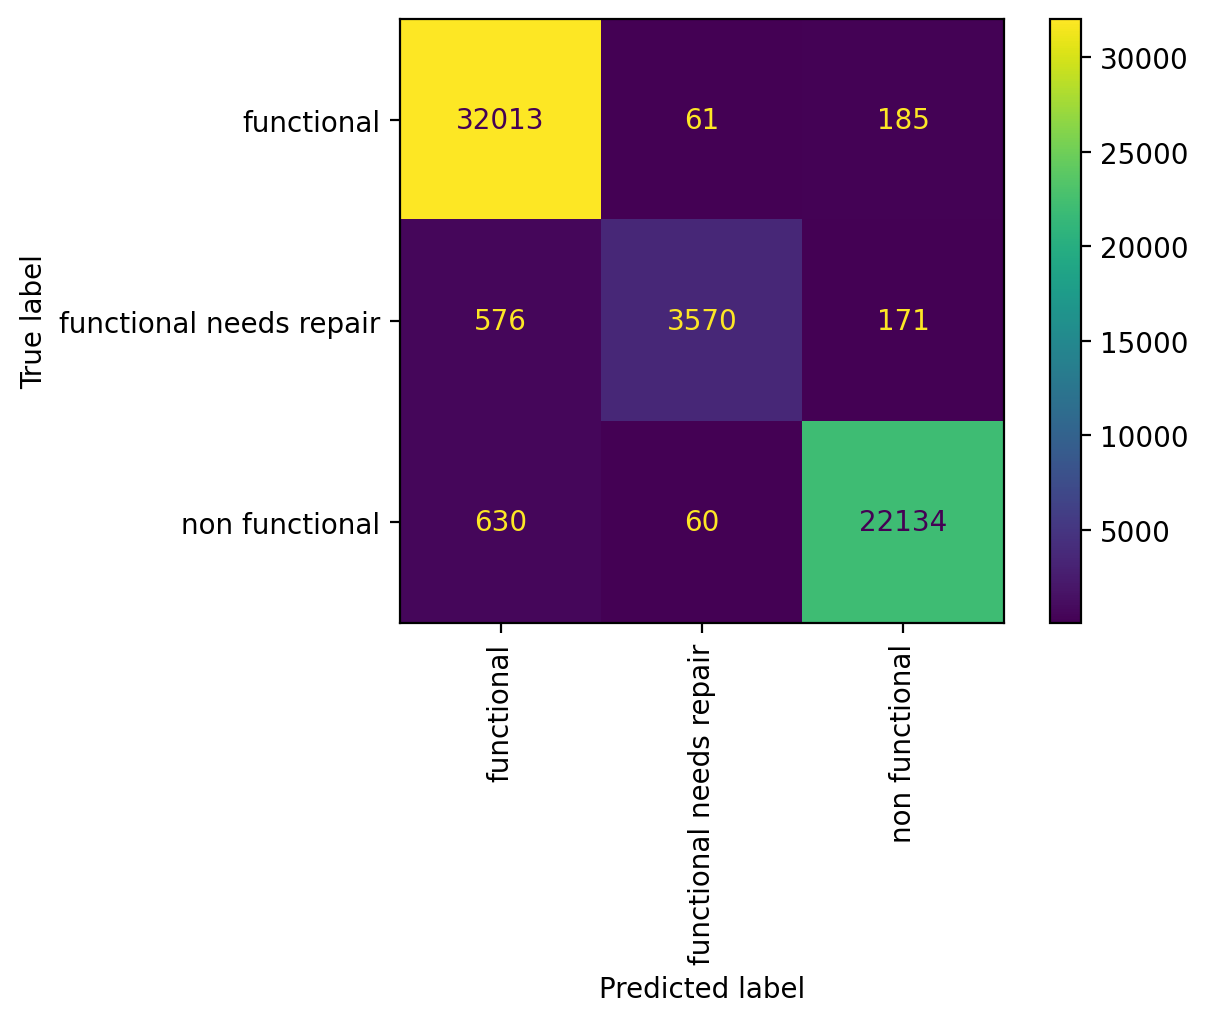

In [65]:
plt.rcParams['figure.dpi'] = 200
plot_confusion_matrix(pipeline, X_train, y_train, values_format='.0f',xticks_rotation='vertical');

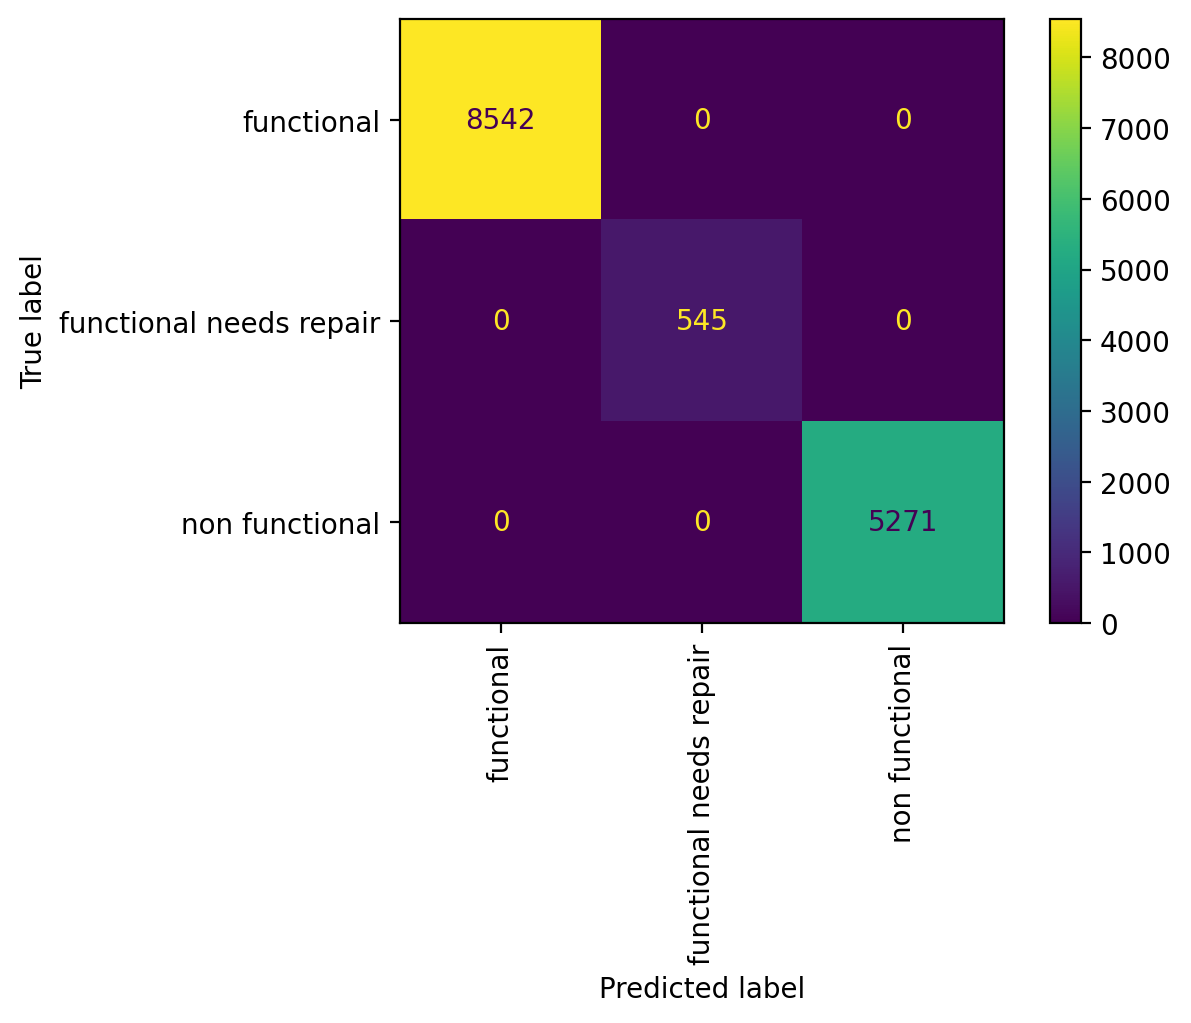

In [62]:
plt.rcParams['figure.dpi'] = 200
plot_confusion_matrix(pipeline, X_test, y_pred, values_format='.0f',xticks_rotation='vertical');

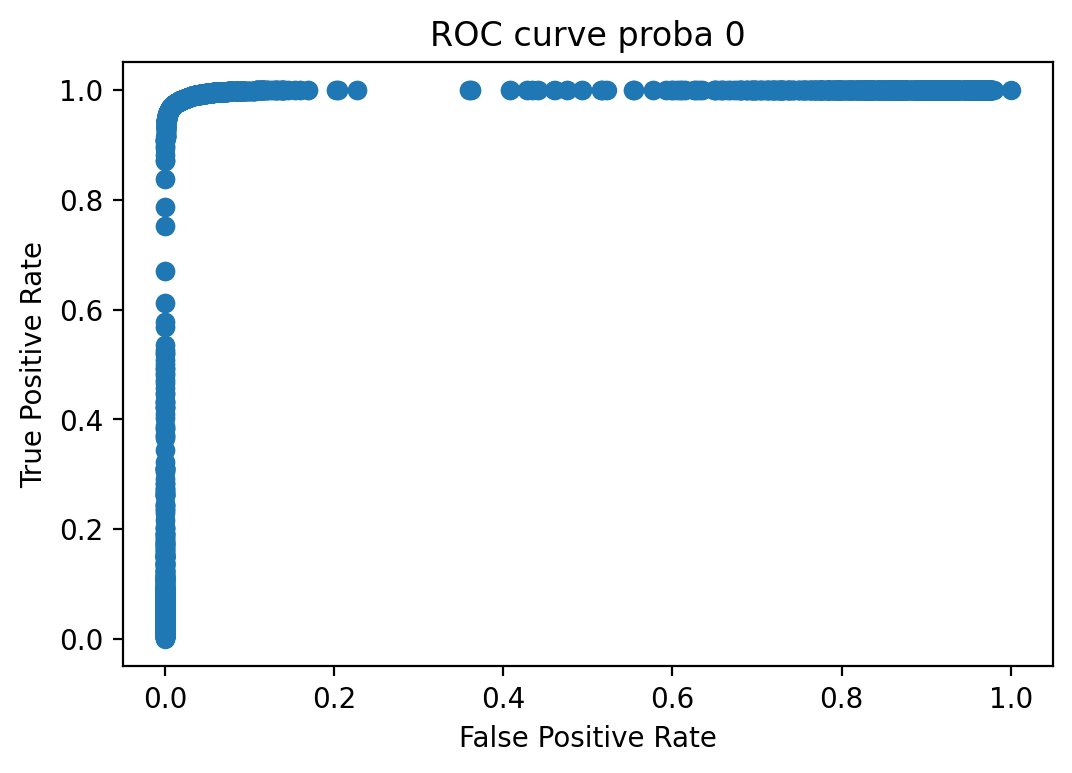

In [66]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(fpr, tpr)
plt.title('ROC curve proba 0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [54]:
fpr1, tpr1, thresholds1 = roc_curve(y_train1[:,1], y_proba1)
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.97918279 0.9797723  1.        ] [0.         0.00130196 0.00142596 ... 1.         1.         1.        ] [2.00000000e+00 1.00000000e+00 9.99985755e-01 ... 2.38095238e-05
 2.10970464e-05 0.00000000e+00]


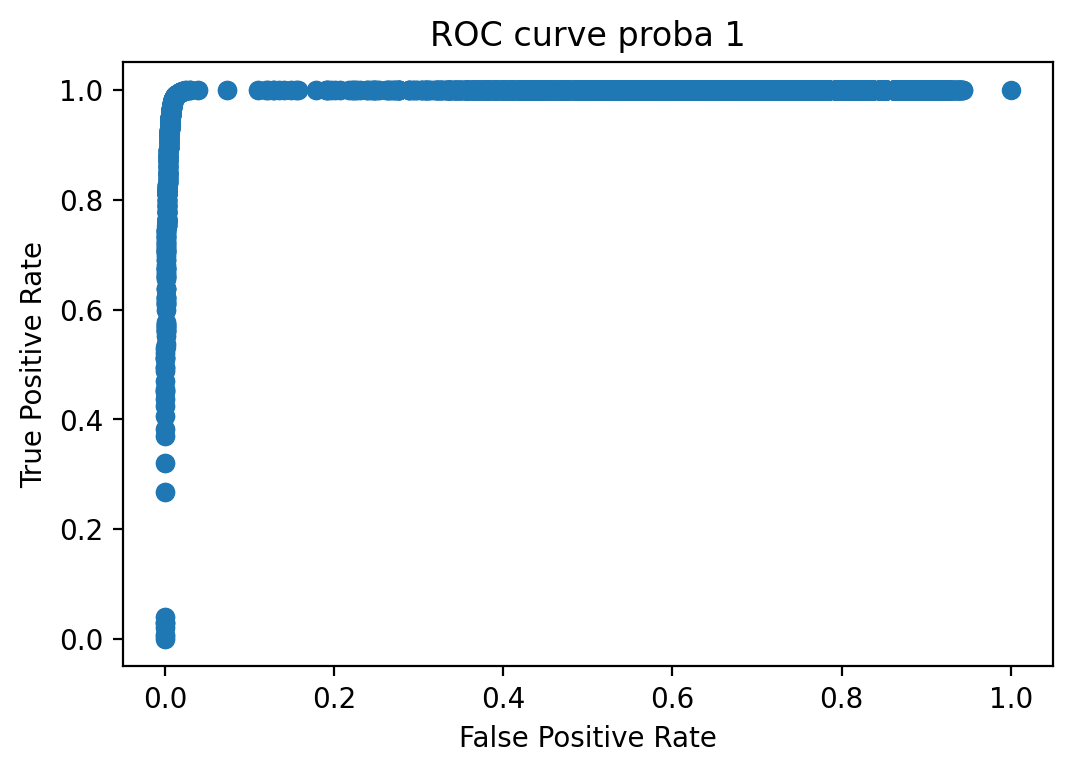

In [67]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(fpr1, tpr1)
plt.title('ROC curve proba 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [56]:
fpr2, tpr2, thresholds2 = roc_curve(y_train1[:,2], y_proba2)
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.97918279 0.9797723  1.        ] [0.         0.00130196 0.00142596 ... 1.         1.         1.        ] [2.00000000e+00 1.00000000e+00 9.99985755e-01 ... 2.38095238e-05
 2.10970464e-05 0.00000000e+00]


In [57]:
y_train

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

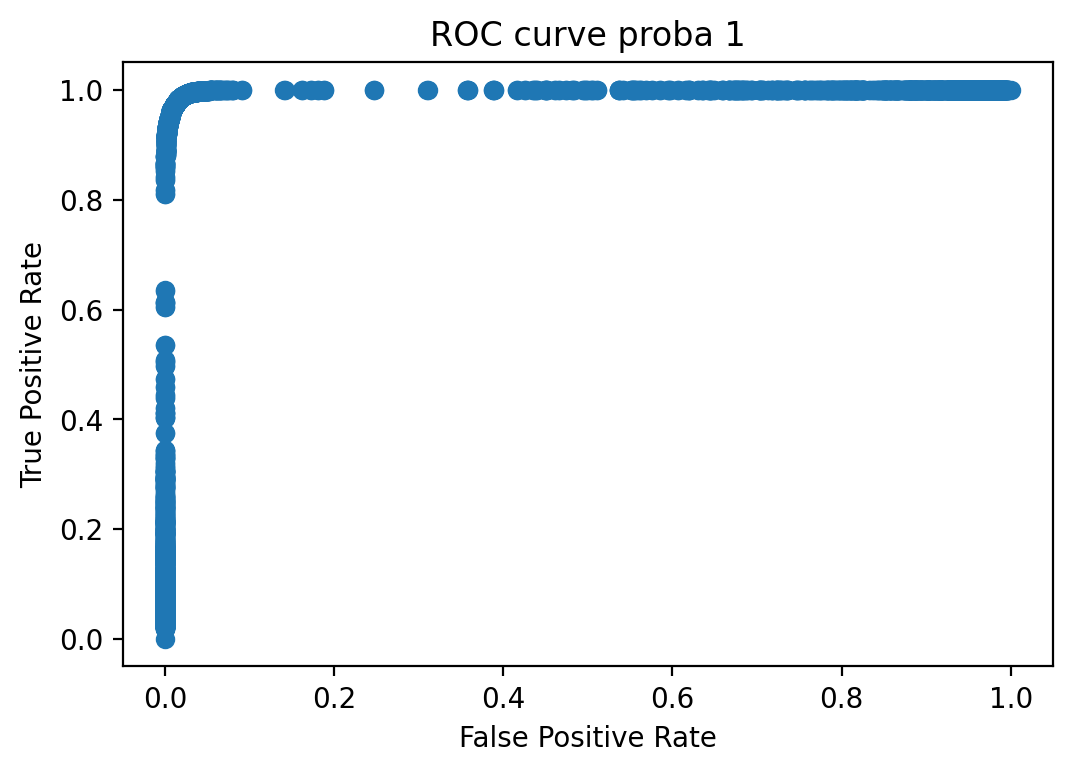

In [68]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(fpr2, tpr2)
plt.title('ROC curve proba 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [59]:
# rev = input("Rev ID")

In [60]:
# sub2_JU = pd.DataFrame({"id":test['id'],"status_group":y_pred})
# sub2_JU.to_csv(f'waterpumps_sub2{rev}_JU', index=False)